Assignment 3 (due on 11/22)

Student:徐嘉玉（12231090），Gtihub：XKimmy

批改人：赵淑慧

得分：46/60

In [1]:
import warnings
warnings.filterwarnings("ignore")
import xarray as xr
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import matplotlib.pyplot as plt
import numpy as np

## 1. Niño 3.4 index
19/20  
1. Niño 3.4范围正确，计算月度气候态（多年平均每月）的SST，并获取SST距平。——你的monthly mean和monthly climatology理解反了。10/10
2. 根据厄尔尼诺和拉尼娜事件定义，模仿例图（x轴月尺度时间，y轴温度距平，黑线表示三个月滑动平均的距平值，红柱表示正距平，蓝柱表示负距平，有两种事件的阈值水平线）进行绘图。——未完成3个月的滑动平均。9/10

滑动平均参考代码：nino34=ds_nino_anomaly.rolling(time=3,center=True).mean()

### 1.1  Compute monthly climatology for SST from Niño 3.4 region, and subtract climatology from SST time series to obtain anomalies.

In [2]:
ncfile = r"C:\Program1\jupyter_notebook\ese5023\NOAA_NCDC_ERSST_v3b_SST.nc"
ds = xr.open_dataset(ncfile)
ds

<xarray.Dataset>
Dimensions:  (lat: 89, lon: 180, time: 684)
Coordinates:
  * lat      (lat) float32 -88.0 -86.0 -84.0 -82.0 -80.0 ... 82.0 84.0 86.0 88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1960-01-15 1960-02-15 ... 2016-12-15
Data variables:
    sst      (time, lat, lon) float32 ...
Attributes:
    Conventions:  IRIDL
    source:       https://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCDC/.ERSST/...
    history:      extracted and cleaned by Ryan Abernathey for Research Compu...

In [3]:
# Read variables
time = ds['time'][:]
lat  = ds['lat'][:]                       
lon  = ds['lon'][:]
sst  = ds['sst'][:,:,:]

In [4]:
# Set up the map.
def plotmap():
    plt.figure(figsize=(15,10))
    plt.rcParams['figure.figsize'] = (15, 10)
    
    #Set the projection information
    proj = ccrs.PlateCarree(central_longitude=180)
    #Create a figure with an axes object and ass the projection to that axes.
    fig,ax = plt.subplots(subplot_kw=dict(projection=proj))
    
    # Set X and Y axes
    ax.set_xticks([0,60,120,180,240,300,360],crs=ccrs.PlateCarree())
    ax.set_yticks([-90,-60,-30,0,30,60,90],crs=ccrs.PlateCarree())
    lon_formatter = LongitudeFormatter()
    lat_formatter = LatitudeFormatter()
    ax.xaxis.set_major_formatter(lon_formatter)
    ax.yaxis.set_major_formatter(lat_formatter)
    ax.tick_params(axis='both',labelsize=13)

    # Add coastlines
    ax.coastlines(zorder=10)
    
    # Add gridlines
    ax.gridlines(xlocs=np.arange(0,361,30), ylocs=np.arange(-90,91,30))
    
    return fig,ax

In [5]:
# Calculate the monthly mean SST
sstmean = np.zeros((12,89,180))
for i in range(0,12):
    month = sst.isel(time=slice(i,180,12)).values
    monthmean = np.mean(month,axis=0)
    sstmean[i,:,:] = monthmean[:,:]

In [11]:
# Select the Niño 3.4 region
# Niño 3.4 (5N-5S, 170W-120W)
region34 = sst.sel(lat=slice(-5,5)).sel(lon=slice(190,240))
#ctime = time.sel(time=slice('1982','2018'))
region34_mean = np.mean(region34,axis=(1,2))

<Figure size 1200x400 with 0 Axes>

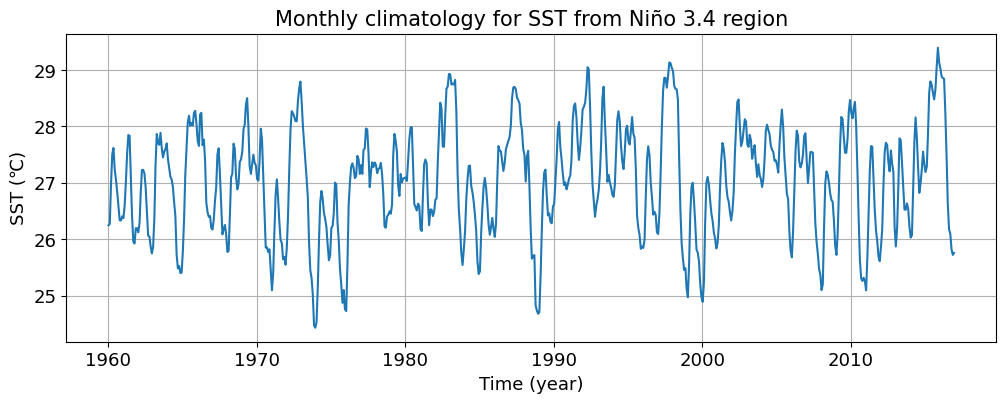

In [33]:
fig = plt.figure(figsize=(12,4))
plt.rcParams['figure.figsize'] = (12,4)

fig, ax = plt.subplots()

ax.plot(time,region34_mean)
ax.tick_params(axis='both',labelsize=13)
ax.set_xlabel('Time (year)',fontsize=13)
ax.set_ylabel('SST (℃)',fontsize=13)
ax.set_title('Monthly climatology for SST from Niño 3.4 region',fontsize=15)
ax.grid()

plt.show()

In [35]:
# Calculate the monthly mean SST of Niño 3.4 region
region34_m_mean = np.zeros(12)
for i in range(0,12):
    region34_m_mean[i] = np.mean(region34_mean.isel(time=np.arange(i,180,12)).values)

# Calculate the anomalies
# Subtract the monthly mean SST to detrend the seasonal variation
region34_anoma = np.zeros(57*12)
for i in range(0,57*12):
    k = i % 12
    region34_anoma[i] = region34_mean.values[i] - region34_m_mean[k]

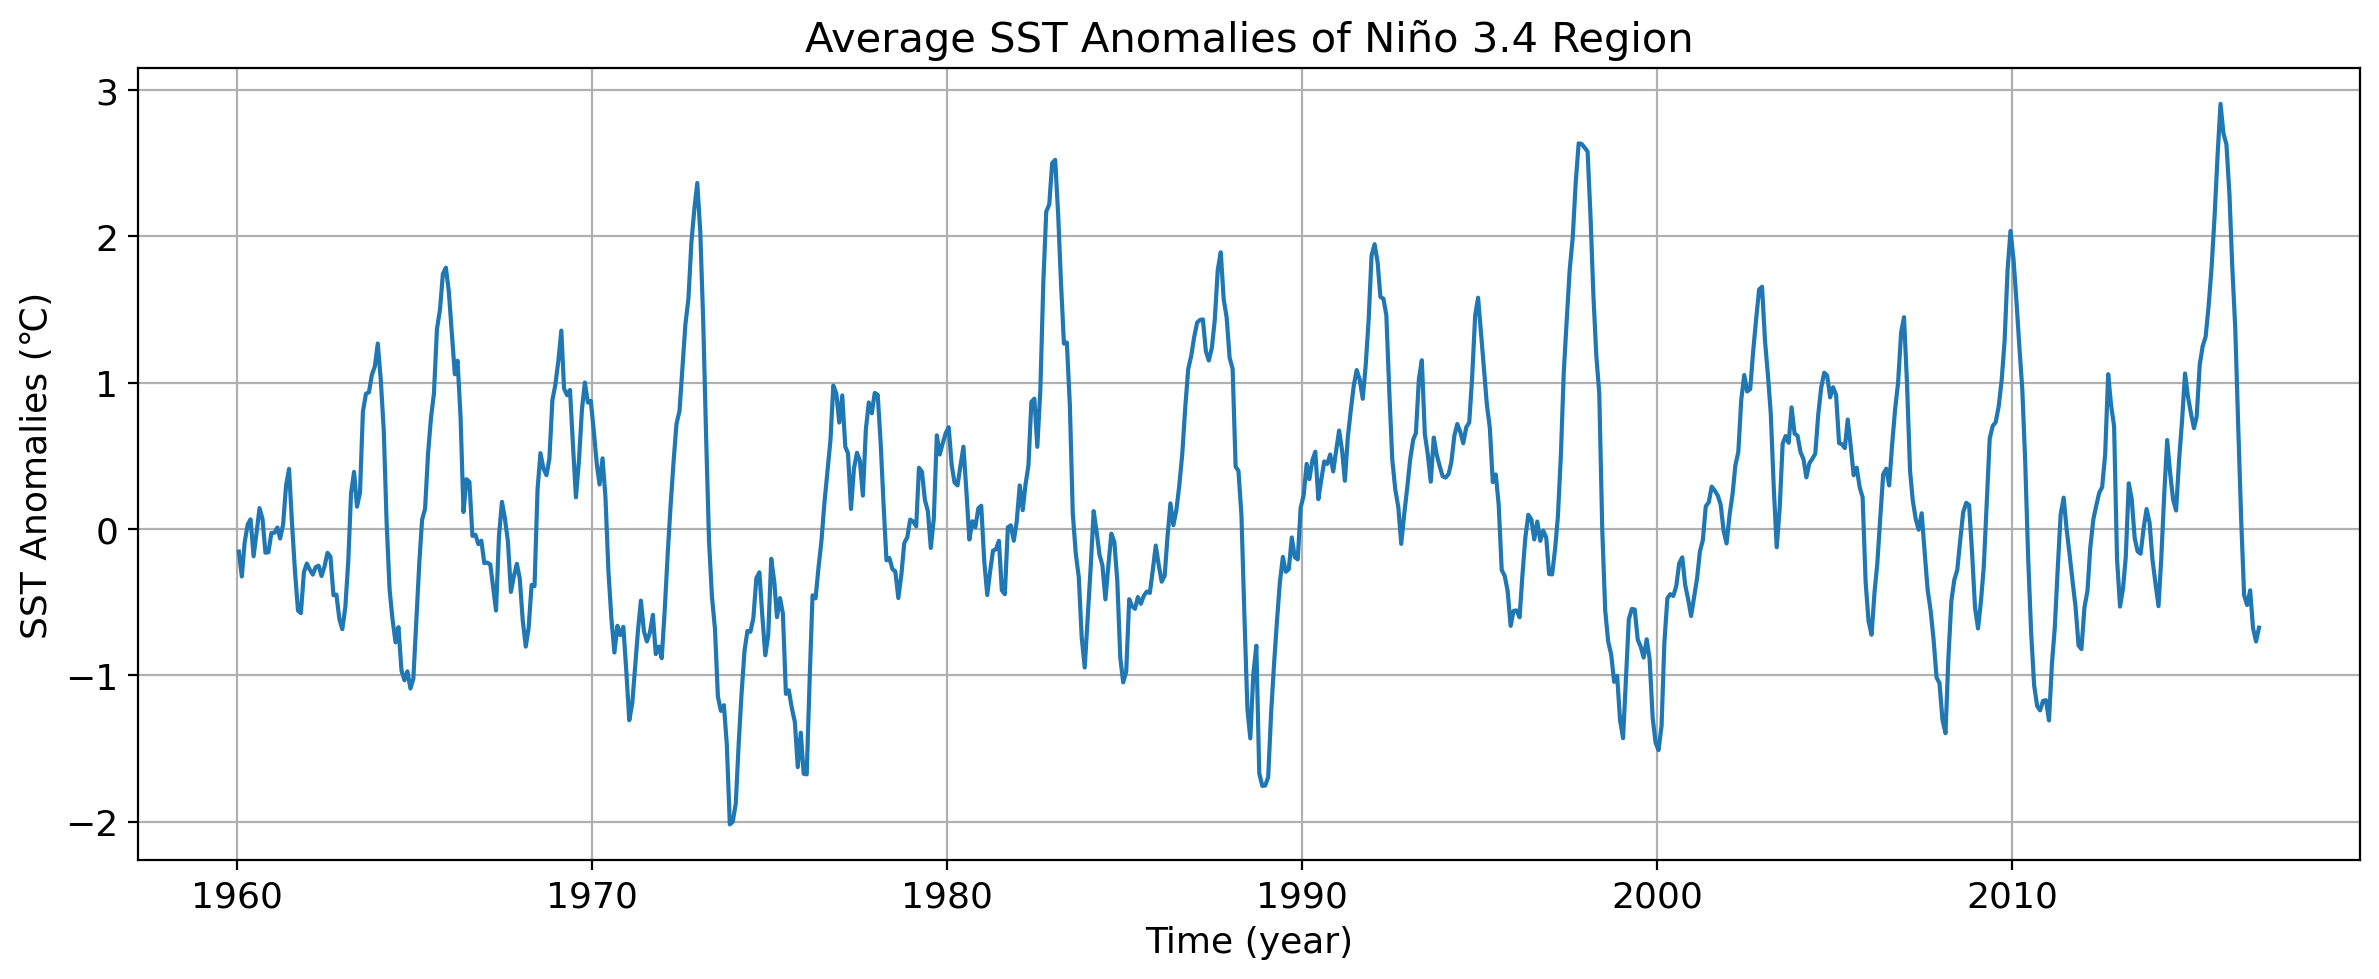

In [36]:
fig, ax = plt.subplots(figsize=(12,5),dpi=200)

ax.plot(time,region34_anoma)
ax.tick_params(axis='both',labelsize=13)
#ax.set_ylim(-3.5,3.5)
ax.set_xlabel('Time (year)',fontsize=13)
ax.set_ylabel('SST Anomalies (℃)',fontsize=13)
ax.set_title('Average SST Anomalies of Niño 3.4 Region',fontsize=15)
ax.grid()
plt.tight_layout()
plt.show()

### 1.2 Visualize the computed Niño 3.4.

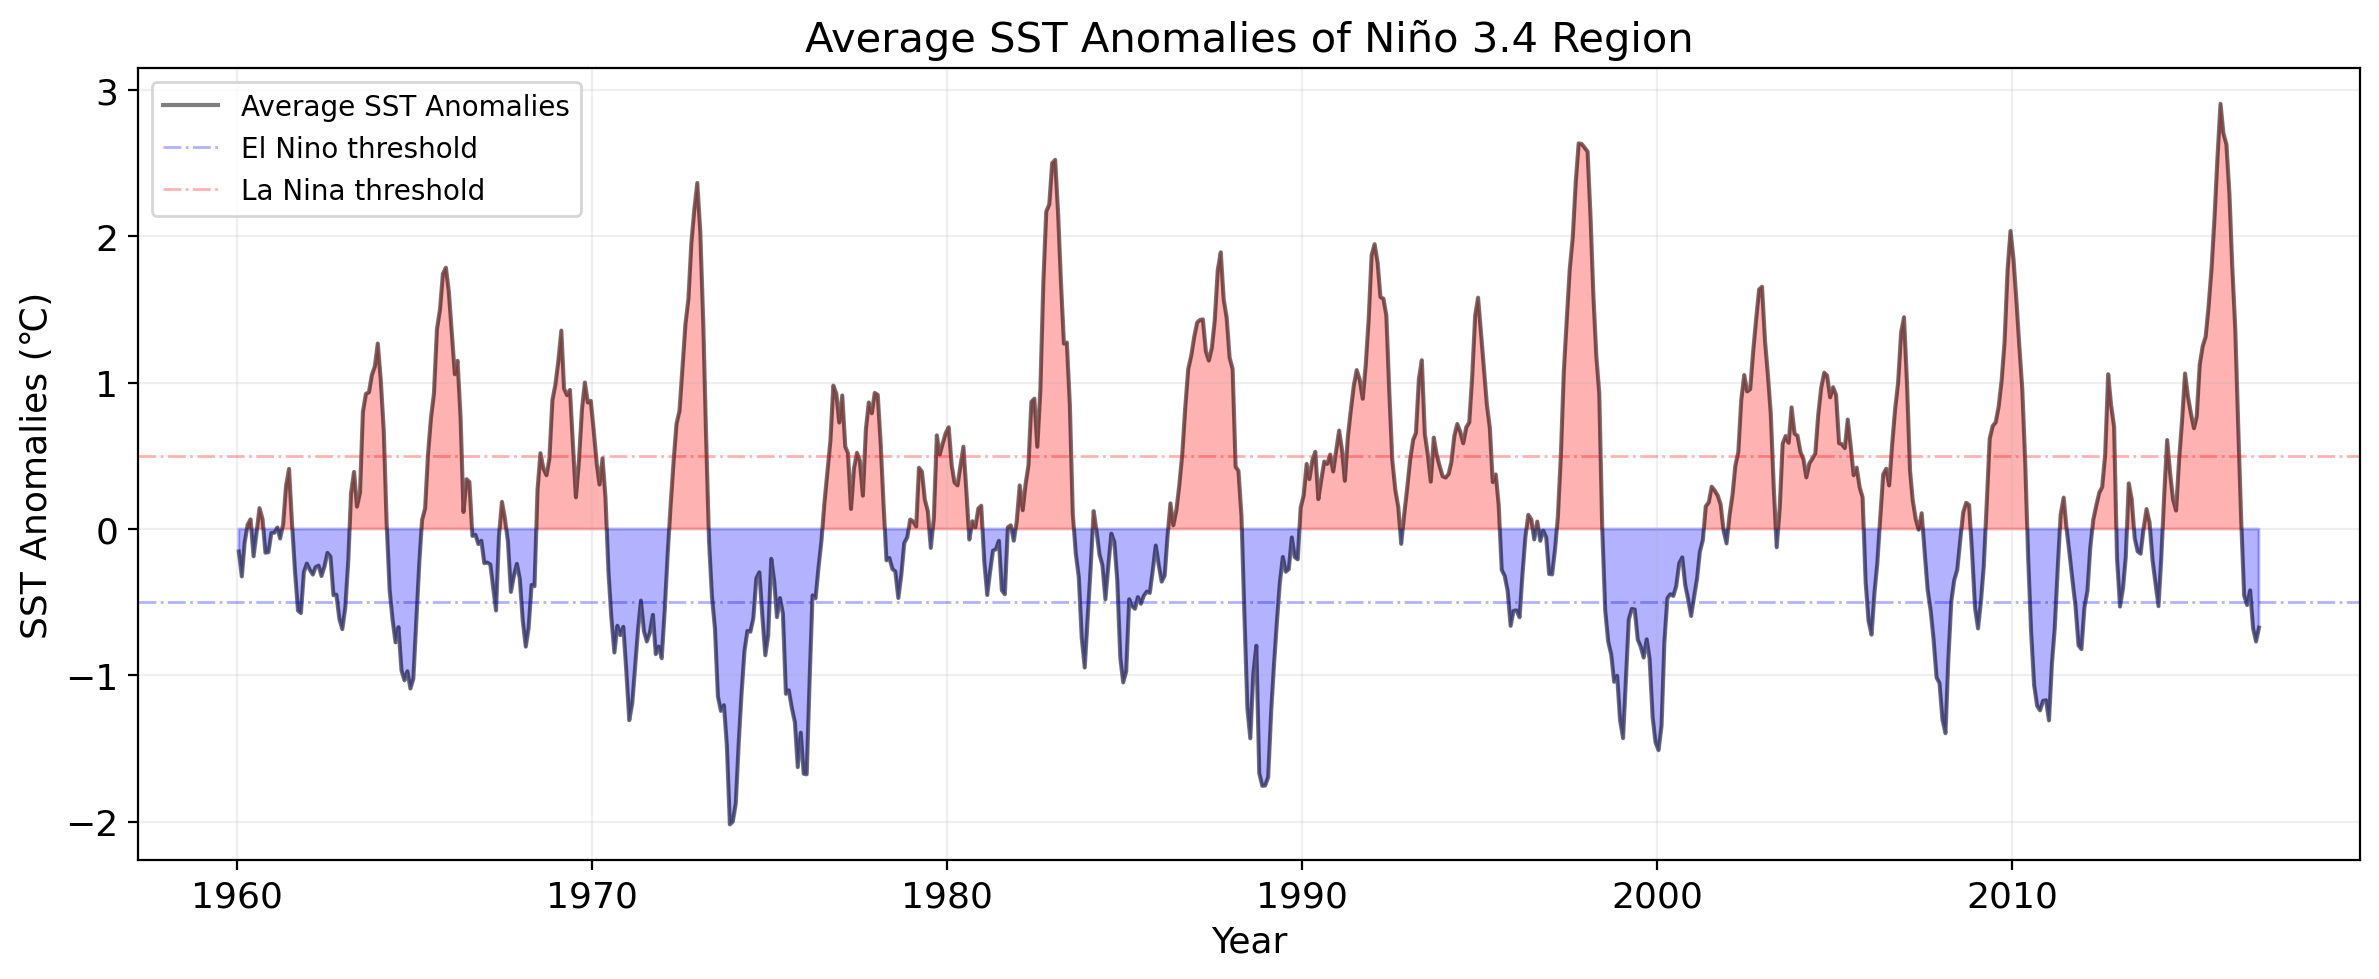

In [38]:
fig, ax = plt.subplots(figsize=(12,5),dpi=200)

ax.plot(time,region34_anoma, label = 'Average SST Anomalies',color='black', alpha=0.5)
ax.fill_between(time, region34_anoma, where=(region34_anoma > 0), interpolate=True, color='red', alpha=0.3)
ax.fill_between(time, region34_anoma, where=(region34_anoma < 0), interpolate=True, color='blue', alpha=0.3)

ax.axhline(y=-0.5, color='blue', linestyle='-.', label='El Nino threshold', linewidth=1, alpha=0.3)
ax.axhline(y=0.5, color='red', linestyle='-.',  label='La Nina threshold', linewidth=1, alpha=0.3)

ax.tick_params(axis='both',labelsize=13)
#ax.set_ylim(-3.5,3.5)
ax.set_xlabel('Year',fontsize=13)
ax.set_ylabel('SST Anomalies (℃)',fontsize=13)
ax.set_title('Average SST Anomalies of Niño 3.4 Region',fontsize=15)
ax.grid(alpha=0.2)

plt.tight_layout()
plt.legend()
plt.show()

## 2. Earth’s energy budget
17/30  
1. 绘制按时间平均的全天况下的TOA长波、短波、太阳辐射的2D图，将三者加和并可视化确认他们的和与TOA净通量相等。——图都缺少图名和变量的单位。4/5
2. 计算并确认TOA入射太阳辐射、出射长波、出射短波与示例图中的信息相符合，注意计算每个格网的实际面积。——没有计算格网面积或纬度权重，计算的目标不符合题目要求。2/10
3. 计算并绘制每1度纬度带上的净辐射总量，注意正确的单位。——没有根据不同格网的面积计算辐射总量，变量单位应为W，缺少图名。3/5
4. 计算并绘制低云区和高云区的按时间平均的出射短波和长波辐射的2D合成图。注意低云区和高云区的定义。——缺少变量单位。4/5
5. 计算在高云区和低云区合成的短波和长波辐射的总体平均值，并回答云层对短波和长波辐射的总体影响是怎样的？——没有根据格网面积或纬度计算权重。4/5

### 2.1 Make a 2D plot of the time-mean TOA longwave, shortwave, and solar radiation for all-sky conditions. Add up the three variables above and verify (visually) that they are equivalent to the TOA net flux.

In [12]:
ncfile2 = r"C:\Program1\jupyter_notebook\ese5023\CERES_EBAF-TOA_200003-201701.nc"
ds2 = xr.open_dataset(ncfile2)
ds2

<xarray.Dataset>
Dimensions:                      (lon: 360, time: 203, lat: 180)
Coordinates:
  * lon                          (lon) float32 0.5 1.5 2.5 ... 357.5 358.5 359.5
  * time                         (time) datetime64[ns] 2000-03-15 ... 2017-01-15
  * lat                          (lat) float32 -89.5 -88.5 -87.5 ... 88.5 89.5
Data variables: (12/14)
    toa_sw_all_mon               (time, lat, lon) float32 ...
    toa_lw_all_mon               (time, lat, lon) float32 ...
    toa_net_all_mon              (time, lat, lon) float32 ...
    toa_sw_clr_mon               (time, lat, lon) float32 ...
    toa_lw_clr_mon               (time, lat, lon) float32 ...
    toa_net_clr_mon              (time, lat, lon) float32 ...
    ...                           ...
    toa_cre_net_mon              (time, lat, lon) float32 ...
    solar_mon                    (time, lat, lon) float32 ...
    cldarea_total_daynight_mon   (time, lat, lon) float32 ...
    cldpress_total_daynight_mon  (time, lat, lon) float32 ...
    cldtemp_total_daynight_mon   (time, lat, lon) float32 ...
    cldtau_total_day_mon         (time, lat, lon) float32 ...
Attributes:
    title:             CERES EBAF (Energy Balanced and Filled) TOA Fluxes. Mo...
    institution:       NASA/LaRC (Langley Research Center) Hampton, Va
    Conventions:       CF-1.4
    comment:           Data is from East to West and South to North.
    Version:           Edition 4.0; Release Date March 7, 2017
    Fill_Value:        Fill Value is -999.0
    DOI:               10.5067/TERRA+AQUA/CERES/EBAF-TOA_L3B.004.0
    Production_Files:  List of files used in creating the present Master netC...

In [13]:
lw = ds2['toa_lw_all_mon']
sw = ds2['toa_sw_all_mon']
rad = ds2['solar_mon']
net = ds2['toa_net_all_mon']

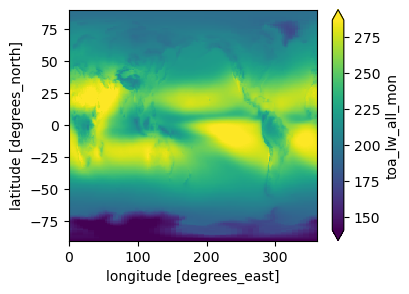

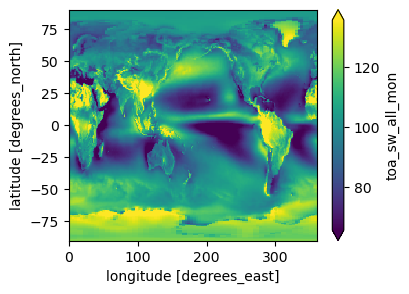

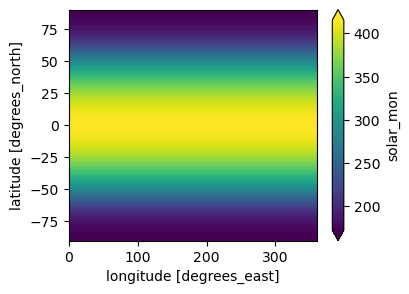

In [15]:
# Make a 2D plot of the time-mean TOA longwave, shortwave, and solar radiation for all-sky conditions. 
lw.mean(dim='time').plot(size=3,robust=True)
sw.mean(dim='time').plot(size=3,robust=True)
rad.mean(dim='time').plot(size=3,robust=True)

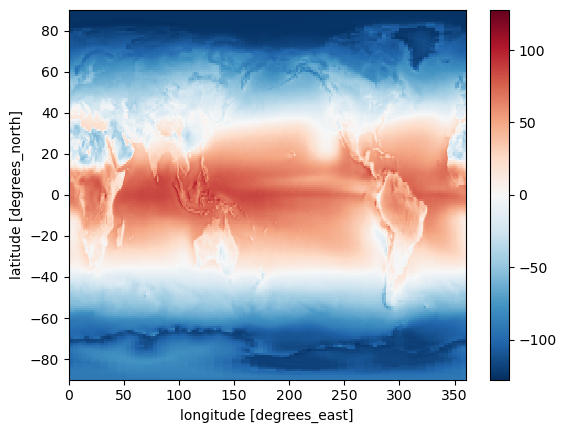

In [16]:
# Visualise the three variables above
(rad.mean(dim='time')-lw.mean(dim='time')-sw.mean(dim='time')).plot()

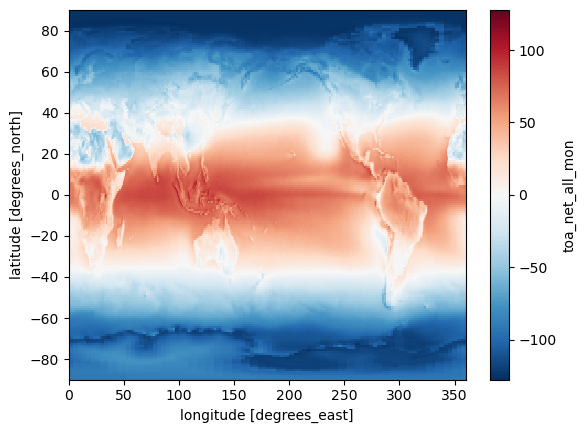

In [17]:
# Visualise the TOA net flux
net.mean(dim='time').plot()

By Comparing the figure of the above two flux, we can know that the incoming solar radiation substract the outcoming longwave and shortwave radiation equals to the net TOA flux.

### 2.2 Calculate and verify that the TOA incoming solar, outgoing longwave, and outgoing shortwave approximately match up with the cartoon above.

In [18]:
in_solar = rad.mean()
out_lw = lw.mean()
out_sw = sw.mean()
print("incoming solar: ", in_solar.values)
print("outgoing longwave: ", out_lw.values)
print("outgoing shortwave: ", out_sw.values)

incoming solar:  298.33038
outgoing longwave:  224.7552
outgoing shortwave:  102.30436


In [19]:
(in_solar.values-out_lw.values-out_sw.values)


-28.72918

In [20]:
net.mean().values

array(-28.729034, dtype=float32)

In [28]:
# TA corrected
weights = np.cos(np.deg2rad(rad.lat))
sr_weight = rad.mean(dim='time').weighted(weights)
lw_weight = lw.mean(dim='time').weighted(weights)
sw_weight = sw.mean(dim='time').weighted(weights)
print('solar radiations:',sr_weight.mean(dim=('lon', 'lat')).values,'(W/m^2)')
print('outgoing longwave:',lw_weight.mean(dim=('lon', 'lat')).values,'(W/m^2)')
print('outgoing shortwave:',sw_weight.mean(dim=('lon', 'lat')).values,'(W/m^2)')
print('Approximately match up with the cartoon, that is 340.4 incoming solar radiation, 239.9 total outgoing infrared radiation and 99.9 total reflected solar radiation (Unit: W/m^2).')

solar radiations: 340.28354 (W/m^2)
outgoing longwave: 240.2667 (W/m^2)
outgoing shortwave: 99.138596 (W/m^2)
Approximately match up with the cartoon, that is 340.4 incoming solar radiation, 239.9 total outgoing infrared radiation and 99.9 total reflected solar radiation (Unit: W/m^2).


### 2.3 Calculate and plot the total amount of net radiation in each 1-degree latitude band. Label with correct units.

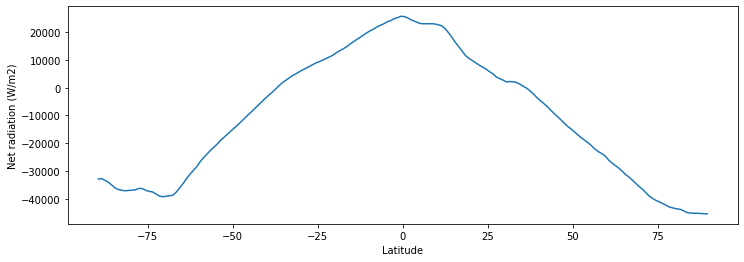

In [489]:
net.sum(dim='lon').mean(dim='time').plot()
plt.xlabel('Latitude')
plt.ylabel('Net radiation (W/m2)')
plt.show()

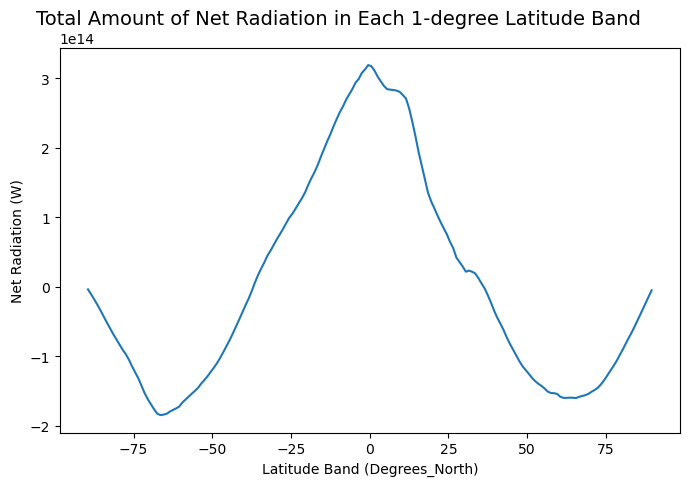

In [39]:
# TA corrected
"""
Area calculations: https://seaflux.readthedocs.io/en/stable/_modules/pyseaflux/area.html
-----------------
Calculates the area of pixels for a give grid input.
"""
def earth_radius(lat):
    """Calculate the radius of the earth for a given latitude

    Args:
        lat (array, float): latitude value (-90 : 90)

    Returns:
        array: radius in metres
    """
    from numpy import cos, deg2rad, sin

    lat = deg2rad(lat)
    a = 6378137
    b = 6356752
    r = (
        ((a ** 2 * cos(lat)) ** 2 + (b ** 2 * sin(lat)) ** 2)
        / ((a * cos(lat)) ** 2 + (b * sin(lat)) ** 2)
    ) ** 0.5

    return r
def area_grid(lat, lon, return_dataarray=False):
    """Calculate the area of each grid cell for given lats and lons

    Args:
        lat (array): latitudes in decimal degrees of length N
        lon (array): longitudes in decimal degrees of length M
        return_dataarray (bool, optional): if True returns xr.DataArray, else array

    Returns:
        array, xr.DataArray: area of each grid cell in meters

    References:
        https://github.com/chadagreene/CDT/blob/master/cdt/cdtarea.m
    """
    from numpy import cos, deg2rad, gradient, meshgrid

    ylat, xlon = meshgrid(lat, lon)
    R = earth_radius(ylat)

    dlat = deg2rad(gradient(ylat, axis=1))
    dlon = deg2rad(gradient(xlon, axis=0))

    dy = dlat * R
    dx = dlon * R * cos(deg2rad(ylat))

    area = dy * dx

    if not return_dataarray:
        return area
    else:
        from xarray import DataArray

        xda = DataArray(
            area.T,
            dims=["lat", "lon"],
            coords={"lat": lat, "lon": lon},
            attrs=dict(
                long_name="Area per pixel",
                units="m^2",
                description=(
                    "Area per pixel as calculated by pySeaFlux. The non-"
                    "spherical shape of Earth is taken into account."
                ),
            ),
        )

        return xda
def get_area_from_dataset(dataarray, lat_name="lat", lon_name="lon"):
    """
    Calculate the grid cell area from a xr.Dataset or xr.DataArray.
    """
    da = dataarray
    x = da.lon.values
    y = da.lat.values

    area = area_grid(y, x, return_dataarray=True)

    return area

toa_net=net.mean(dim='time')
area=get_area_from_dataset(toa_net)
net_rad_lat_band=(toa_net*area).sum(dim='lon')
plt.figure(111,figsize=(8,5))
plt.plot(net_rad_lat_band.lat,net_rad_lat_band)
plt.xlabel('Latitude Band (Degrees_North)')
plt.ylabel('Net Radiation (W)')
plt.title('Total Amount of Net Radiation in Each 1-degree Latitude Band',x=0.45,fontsize=14)
plt.show()

### 2.4 Calculate and plot composites of time-mean outgoing shortwave and longwave radiation for low and high cloud area regions.



In [29]:
cloud_frac = ds2['cldarea_total_daynight_mon']

In [30]:
low_sw_mean = sw.where(cloud_frac <= 25).mean(dim='time')
high_sw_mean = sw.where(cloud_frac >= 75).mean(dim='time')

low_lw_mean = lw.where(cloud_frac <= 25).mean(dim='time')
high_lw_mean = lw.where(cloud_frac >= 75).mean(dim='time')

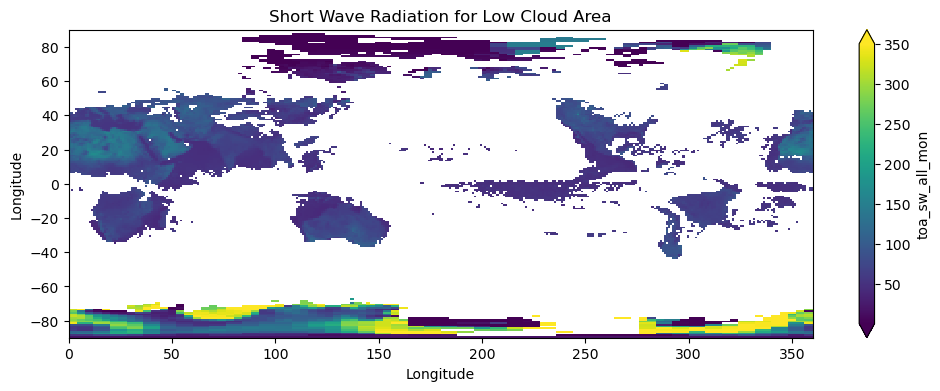

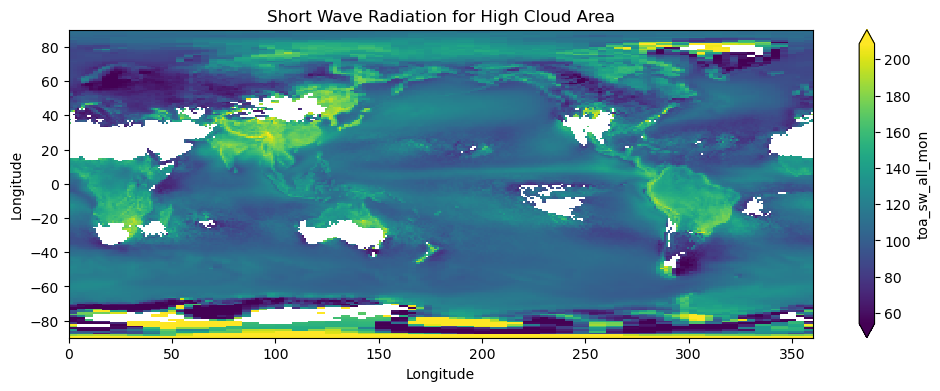

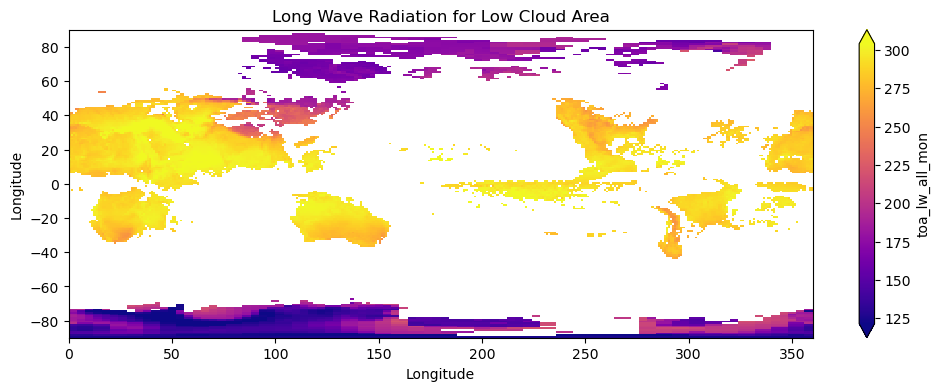

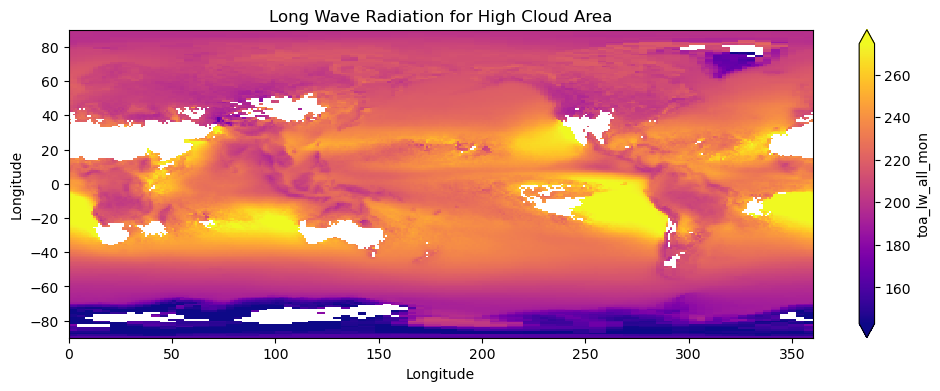

In [40]:
low_sw_mean.plot(cmap='viridis',size=4,robust=True)
plt.title('Short Wave Radiation for Low Cloud Area')
plt.xlabel('Longitude')
plt.ylabel('Longitude')
plt.show()

high_sw_mean.plot(cmap='viridis',size=4,robust=True)
plt.title('Short Wave Radiation for High Cloud Area')
plt.xlabel('Longitude')
plt.ylabel('Longitude')
plt.show()

low_lw_mean.plot(cmap='plasma',size=4,robust=True)
plt.title('Long Wave Radiation for Low Cloud Area')
plt.xlabel('Longitude')
plt.ylabel('Longitude')
plt.show()

high_lw_mean.plot(cmap='plasma',size=4,robust=True)
plt.title('Long Wave Radiation for High Cloud Area')
plt.xlabel('Longitude')
plt.ylabel('Longitude')
plt.show()

### 2.5 Calculate the global mean values of shortwave and longwave radiation, composited in high and low cloud regions. What is the overall effect of clouds on shortwave and longwave radiation?



In [493]:
global_low_sw_mean = low_sw_mean.mean(dim=['lat','lon'])
global_high_sw_mean = high_sw_mean.mean(dim=['lat','lon'])

global_low_lw_mean = low_lw_mean.mean(dim=['lat','lon'])
global_high_lw_mean = high_lw_mean.mean(dim=['lat','lon'])

In [494]:
# Print results
print("Global Mean Shortwave Radiation in Low Cloud Regions:", global_low_sw_mean.values)
print("Global Mean Shortwave Radiation in High Cloud Regions:", global_high_sw_mean.values)

print("Global Mean Longwave Radiation in Low Cloud Regions:", global_low_lw_mean.values)
print("Global Mean Longwave Radiation in High Cloud Regions:", global_high_lw_mean.values)


Global Mean Shortwave Radiation in Low Cloud Regions: 88.81645
Global Mean Shortwave Radiation in High Cloud Regions: 114.74328
Global Mean Longwave Radiation in Low Cloud Regions: 233.06702
Global Mean Longwave Radiation in High Cloud Regions: 215.37349


Based on the result, the high cloud tends to lead the increasing shortwave radiation and lower the longwave radiation.

In [42]:
# TA corrected
weights1 = np.cos(np.deg2rad(low_lw_mean.lat))
lc_mean_shortwave=low_sw_mean.weighted(weights1).mean()
hc_mean_shortwave=high_sw_mean.weighted(weights1).mean()
lc_mean_longwave=low_lw_mean.weighted(weights1).mean()
hc_mean_longwave=high_lw_mean.weighted(weights1).mean()
print(f'The global mean values of shortwave radiation in high and low cloud regions are {hc_mean_shortwave:f} and {lc_mean_shortwave:f} respectively.')
print(f'The global mean values of longwave radiation in high and low cloud regions are {hc_mean_longwave:f} and {lc_mean_longwave:f} respectively.')

The global mean values of shortwave radiation in high and low cloud regions are 113.157120 and 75.494324 respectively.
The global mean values of longwave radiation in high and low cloud regions are 225.708435 and 270.853027 respectively.
In high cloud area regions, shortwave radiation is stronger while longwave radiation is weaker, which means clouds would reflect shortwave and reserve longwave.


## 3. Explore a netCDF dataset
10/10  
1. 绘制某个变量的时间序列，注意去掉月尺度的季节性周期。5/5
2. 用该数据集绘制至少5种不同的图。5/5

The NetCDF dataset I chose is ERA5 reanalysis data, which contains surface 2-meter temperature and 10-meter U/V speed monthly mean from 2017 to 2021. I only use the temperature variable to do some analysis below:

### 3.1 Plot a time series of a certain variable with monthly seasonal cycle removed.

In [495]:
ds3 = xr.open_dataset('/Users/xujiayu/Desktop/Course/RS/Kuangdong/monthly17-21.nc')
ds3

<xarray.Dataset>
Dimensions:    (longitude: 3600, latitude: 1801, time: 60)
Coordinates:
  * longitude  (longitude) float32 0.0 0.1 0.2 0.3 ... 359.6 359.7 359.8 359.9
  * latitude   (latitude) float32 90.0 89.9 89.8 89.7 ... -89.8 -89.9 -90.0
  * time       (time) datetime64[ns] 2017-01-01 2017-02-01 ... 2021-12-01
Data variables:
    u10        (time, latitude, longitude) float32 ...
    v10        (time, latitude, longitude) float32 ...
    t2m        (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2022-10-24 17:12:02 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [337]:
temp = ds3['t2m'] # 2m temperature

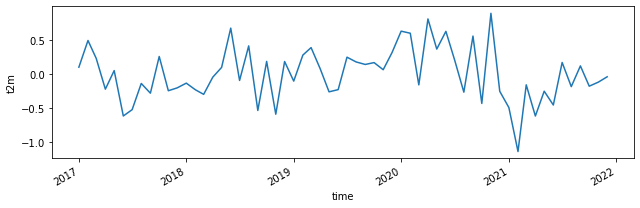

In [496]:
# time series of temperature
time_ser = temp.mean(dim=['latitude','longitude'])

# monthly seasonal cycle
m_season = temp.groupby('time.month').mean(dim='time').mean(['latitude','longitude'])

# removed the seasonal cycle
(time_ser - np.tile(m_season.values,5)).plot(size=3)
plt.tight_layout()
plt.show()


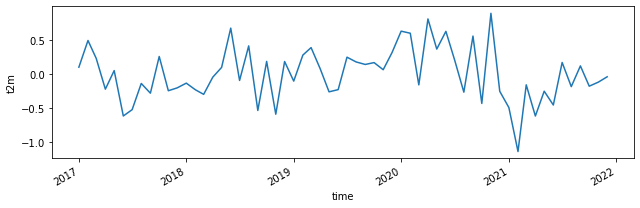

In [497]:
# removed the seasonal cycle
(time_ser - np.tile(m_season.values,5)).plot(size=3)
plt.tight_layout()
plt.show()

### 3.2 Make 5 different plots using the dataset.

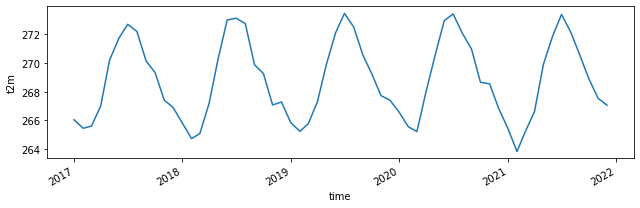

In [453]:
# 1. Time series of mean temperature
time_ser.plot(size=3)
plt.tight_layout()
plt.show()

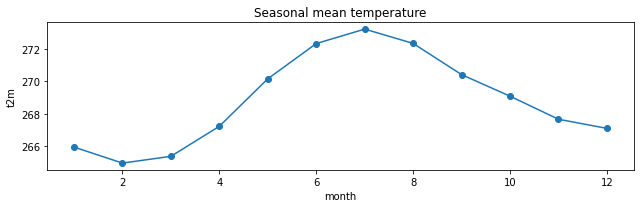

In [454]:
# 2. Seasonal and annual mean of temperature
m_season.plot(marker='o',size=3)
plt.title('Seasonal mean temperature')
plt.tight_layout()
plt.show()

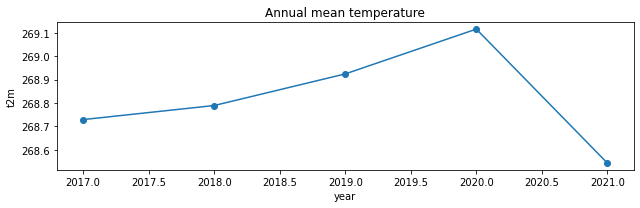

In [455]:
ann_mean = temp.groupby('time.year').mean(dim='time').mean(dim = ['latitude','longitude'])
ann_mean.plot(marker='o',size=3)
plt.title('Annual mean temperature')
plt.tight_layout()
plt.show()

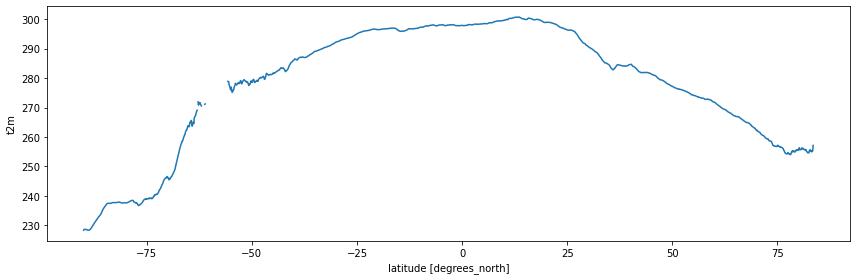

In [460]:
# 3. Time series of mean temperature in different latitude/longitude direction
temp.mean(dim=['longitude','time']).plot()
plt.tight_layout()
plt.show()

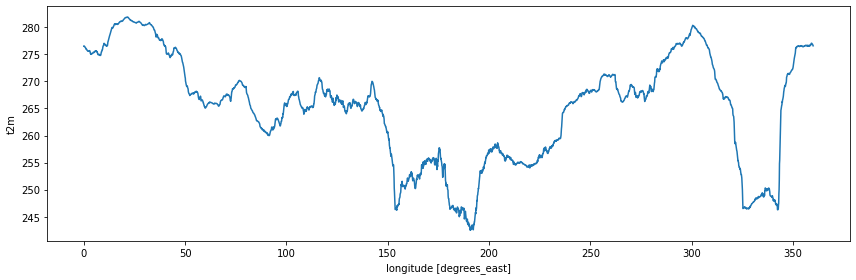

In [459]:
temp.mean(dim=['latitude','time']).plot()
plt.tight_layout()
plt.show()

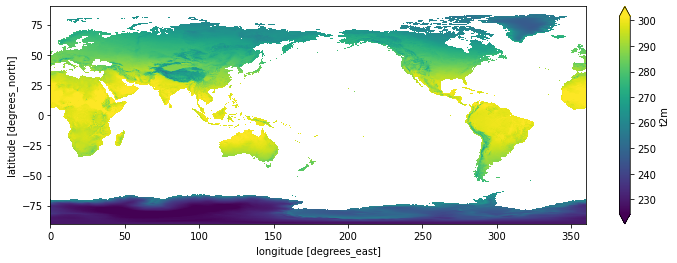

In [463]:
# 4. Mean temperature during the 5 years
temp.mean(dim='time').plot(robust=True)

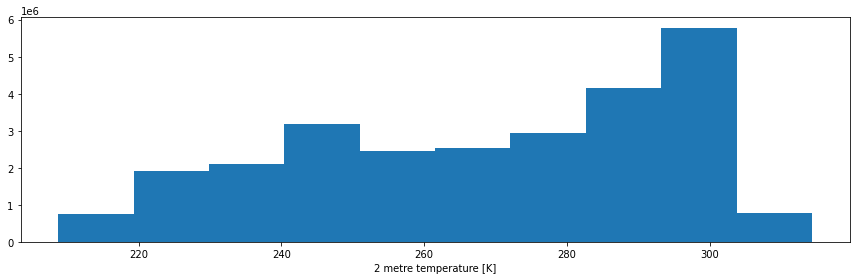

In [464]:
# 5. Histogram of mean temperature over 5 years
temp.groupby('time.month').mean().plot()
plt.tight_layout()
plt.show()